# Quantum Teleportation
## theoretical aspect
let $\Psi$ be the qubit Quantum state of ALEX. ALEX wants to teleport her qubit state $\Psi$ to BOB. The problem is Alex do not know her own quantum state. If Alex go ahead and measure the message, she will collape in to either $| 1 \rangle$ or $| 0 \rangle$. One more important information is that Alex and BOB share an engtangle quantum qubit.

$| \Psi \rangle = a*|0\rangle +b* |1\rangle$ be the quantum state that ALEX does not know and she want to sent this quantum state to BOB.



Generally, $| B_{xy} \rangle=\frac{| 0,x \rangle +(-1)^x| 1,y \rangle}{\sqrt{2}}$

from the definition above, we have $| B_{00} \rangle= \frac{| 00 \rangle +| 11 \rangle}{\sqrt{2}}$


the set up is as follow

we need 3 qubits 2 of which are entangled. Alex will hold one the the entangle qubit and bob will hold another entangle qubit.



In [25]:
import qiskit as q
import matplotlib as mpl
#q.IBMQ.save_account("your_account.txt","r") this will save your IBM quantum computing account
q.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-12 22:19:49,769: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider= q.IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count= len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} quered and {qubit_count} qubits")

ibmq_qasm_simulator has 3 quered and simulated qubits
ibmq_lima has 78 quered and 5 qubits
ibmq_belem has 58 quered and 5 qubits
ibmq_quito has 57 quered and 5 qubits
simulator_statevector has 4 quered and simulated qubits
simulator_mps has 4 quered and simulated qubits
simulator_extended_stabilizer has 4 quered and simulated qubits
simulator_stabilizer has 4 quered and simulated qubits
ibmq_manila has 69 quered and 5 qubits
ibm_nairobi has 139 quered and 7 qubits
ibm_oslo has 76 quered and 7 qubits


In [15]:
n_qubit=q.QuantumRegister(3)
n_classic=q.ClassicalRegister(3)
circuit= q.QuantumCircuit(n_qubit,n_classic)

In [16]:
circuit.h(1)
circuit.cnot(1,2)

In [17]:
circuit.cnot(0,1)
circuit.h(0)


In [18]:
circuit.measure([0,1],[0,1])

In [19]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure(2,2)

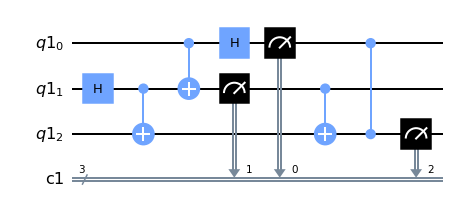

In [20]:
circuit.draw('mpl')

In [31]:
backend=provider.get_backend("ibmq_qasm_simulator")
result= q.execute(circuit, backend= backend, shots=500)
q.tools.monitor.job_monitor(result)

Job Status: job has successfully run


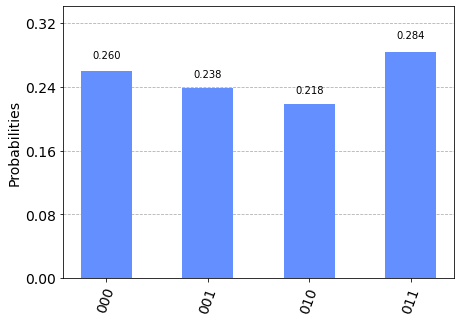

In [33]:
q.visualization.plot_histogram(result.result().get_counts())

# Glover Algorishm
## Theretical Aspect